In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import sparse
import time
import pandas as pd
import gudhi as gd

import ripser
from ripser import ripser
from persim import plot_diagrams
from gudhi import AlphaComplex

In [2]:
lt=pd.read_csv('scaled_polio.csv')

lt.dropna(inplace=True)
lt.isnull().sum()

ParentLocation    0
Location          0
Value             0
Latitude          0
Longitude         0
LifeExpect        0
GDP               0
MedianAge         0
dtype: int64

In [3]:
#grouping by parent location then turning lat long into useable format for alpha complex
grouped = lt.groupby('ParentLocation')
countries={}
for location, group in grouped:
    group[['Latitude','Longitude']]=group[['Latitude','Longitude']].apply(pd.to_numeric)
    group['Point'] = list(zip(group['Latitude'],group['Longitude']))
    pts=group['Point']
#ptz=[list(point) for point in pts]
#ptz
#ptp=np.array(ptz).astype(float)
    points=np.array(pts)
    countries[location]=points

In [4]:
#turning the lat long points into useable format for the alphacomplex for the whole world

lt[['Latitude','Longitude']]=lt[['Latitude','Longitude']].apply(pd.to_numeric)
lt['LvL'] = list(zip(lt['Latitude'],lt['Longitude']))
z=lt['LvL']
zz=np.array(z)

#Life Expectancy and GDP 
lt[['LifeExpect','GDP']]=lt[['LifeExpect','GDP']].apply(pd.to_numeric)
lt['LvG']=list(zip(lt['LifeExpect'],lt['GDP']))
a=lt['LvG']
aa=np.array(a)

#Life Expectancy and Median Age
lt[['LifeExpect','MedianAge']]=lt[['LifeExpect','MedianAge']].apply(pd.to_numeric)
lt['LvM']=list(zip(lt['LifeExpect'],lt['MedianAge']))
b=lt['LvM']
bb=np.array(b)

#Median Age and GDP
lt[['MedianAge','GDP']]=lt[['MedianAge','GDP']].apply(pd.to_numeric)
lt['MvG']=list(zip(lt['LifeExpect'],lt['GDP']))
c=lt['MvG']
cc=np.array(c)

#All Except Lat and Long
lt[['LifeExpect','GDP','MedianAge']]=lt[['LifeExpect','GDP','MedianAge']].apply(pd.to_numeric)
lt['nogeo']=list(zip(lt['LifeExpect'],lt['GDP'],lt['MedianAge']))
d=lt['nogeo']
dd=np.array(d)

#All
lt[['LifeExpect','GDP','MedianAge','Latitude','Longitude']]=lt[['LifeExpect','GDP','MedianAge','Latitude','Longitude']].apply(pd.to_numeric)
lt['all']=list(zip(lt['LifeExpect'],lt['GDP'],lt['MedianAge'],lt['Latitude'],lt['Longitude']))
e=lt['all']
ee=np.array(e)

<function matplotlib.pyplot.show(close=None, block=None)>

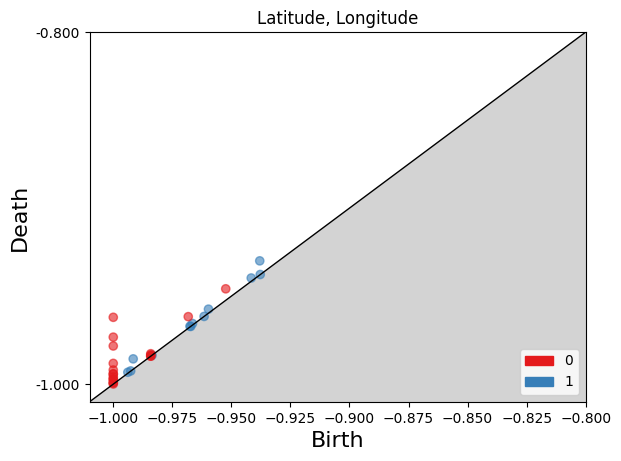

In [17]:
#Lat Long 
LL = AlphaComplex(zz,
                      weights = lt.Value.values)

stree = LL.create_simplex_tree()
#print('Weighted alpha complex is of dimension ', stree.dimension(), ' - ',
      #stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')
fmt = '%s -> %.2f'
#for simplex in stree.get_simplices():
    #print(fmt % tuple(simplex))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
plt.xlim([-1.01,-.8])
plt.ylim([-1.01,-.8])
plt.title('Latitude, Longitude')
plt.savefig('latlong.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

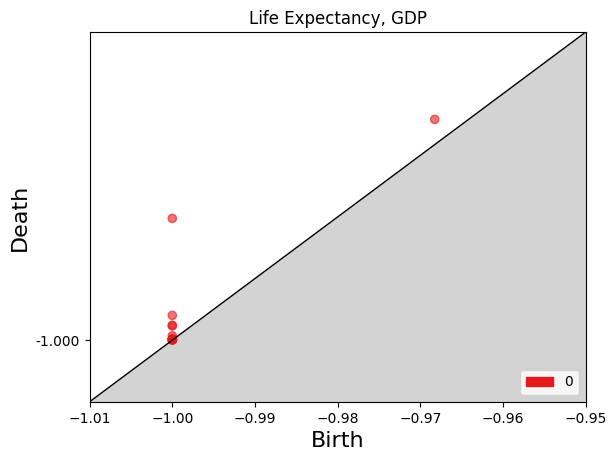

In [20]:
#Life vs GDP
LG = AlphaComplex(aa,
                      weights = lt.Value.values)

stree = LG.create_simplex_tree()
#print('Weighted alpha complex is of dimension ', stree.dimension(), ' - ',
      #stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')
fmt = '%s -> %.2f'
#for simplex in stree.get_simplices():
    #print(fmt % tuple(simplex))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
plt.xlim([-1.01,-.95])
plt.ylim([-1.01,-.95])
plt.title('Life Expectancy, GDP')
plt.savefig('LifeGDP.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

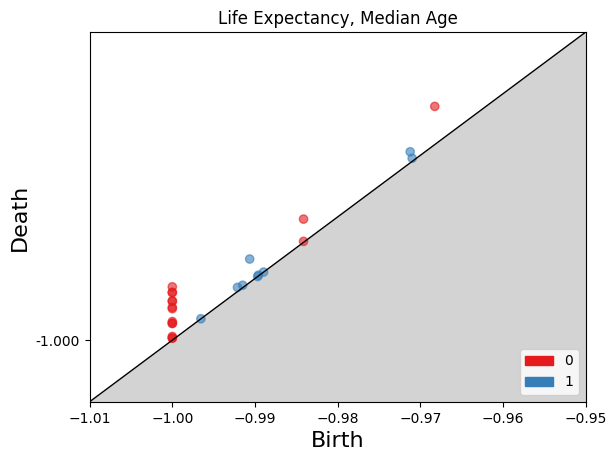

In [25]:
#Life vs Median
LM = AlphaComplex(bb,
                      weights = lt.Value.values)

stree = LM.create_simplex_tree()
#print('Weighted alpha complex is of dimension ', stree.dimension(), ' - ',
      #stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')
fmt = '%s -> %.2f'
#for simplex in stree.get_simplices():
    #print(fmt % tuple(simplex))
dgm = stree.persistence()

gd.plot_persistence_diagram(dgm,legend = True)
plt.xlim([-1.01,-.95])
plt.ylim([-1.01,-.95])
plt.title('Life Expectancy, Median Age')
plt.savefig('LifeMed.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

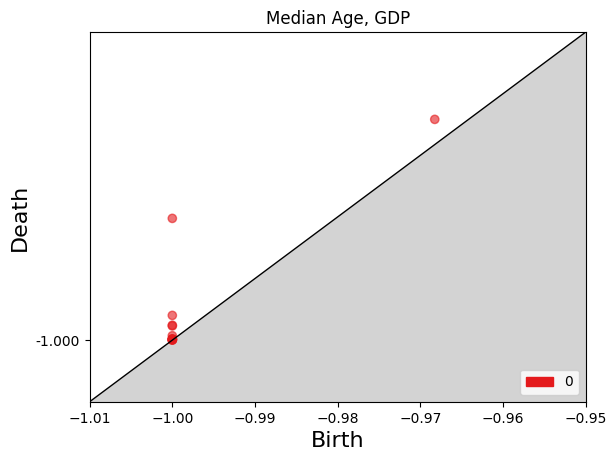

In [27]:
#Median vs GDP
MG = AlphaComplex(cc,
                      weights = lt.Value.values)

stree = MG.create_simplex_tree()
#print('Weighted alpha complex is of dimension ', stree.dimension(), ' - ',
      #stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')
fmt = '%s -> %.2f'
#for simplex in stree.get_simplices():
    #print(fmt % tuple(simplex))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
plt.xlim([-1.01,-.95])
plt.ylim([-1.01,-.95])
plt.title('Median Age, GDP')
plt.savefig('LifeGDP.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

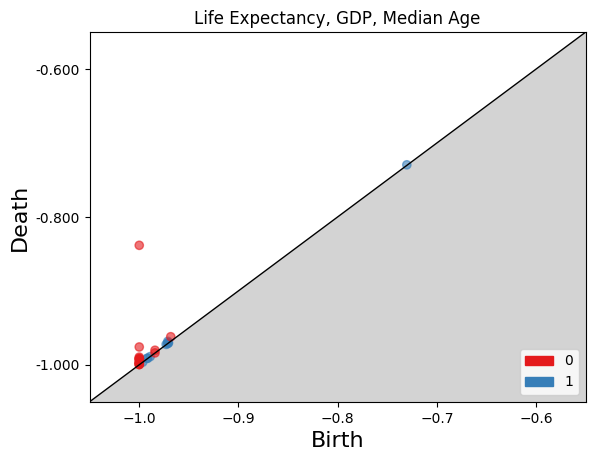

In [32]:
#All except lat long
no_geo = AlphaComplex(dd,
                      weights = lt.Value.values)

stree = no_geo.create_simplex_tree()
#print('Weighted alpha complex is of dimension ', stree.dimension(), ' - ',
      #stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')
fmt = '%s -> %.2f'
#for simplex in stree.get_simplices():
    #print(fmt % tuple(simplex))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
plt.xlim([-1.05,-.55])
plt.ylim([-1.05,-.55])
plt.title('Life Expectancy, GDP, Median Age')
plt.savefig('nogeo.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

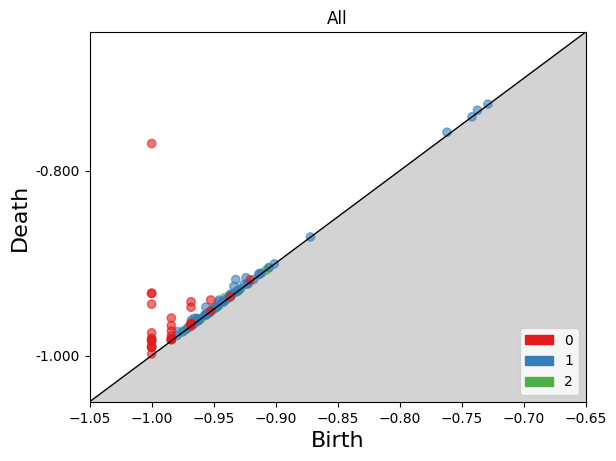

In [35]:
#all
alll = AlphaComplex(ee,
                      weights = lt.Value.values)

stree = alll.create_simplex_tree()
#print('Weighted alpha complex is of dimension ', stree.dimension(), ' - ',
      #stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')
fmt = '%s -> %.2f'
#for simplex in stree.get_simplices():
    #print(fmt % tuple(simplex))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
plt.xlim([-1.05,-.65])
plt.ylim([-1.05,-.65])
plt.title('All')
plt.savefig('all.png')
plt.show

In [ ]:
#Weighted alpha complex for lat long (used as a reference for creating other ones mostly)
wgt_ac = AlphaComplex(pointz,
                      weights = lt.Value.values)

stree = wgt_ac.create_simplex_tree()
#print('Weighted alpha complex is of dimension ', stree.dimension(), ' - ',
      #stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')
fmt = '%s -> %.2f'
#for simplex in stree.get_simplices():
    #print(fmt % tuple(simplex))
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm,legend = True)
plt.show